In [1]:
# 讀取 CSV File
from sklearn.ensemble import RandomForestClassifier
import pandas as pd # 引用套件並縮寫為 pd
df = pd.read_csv('C:/Users/HP/Desktop/mldata/mdata.csv')
df

,Unnamed: 0,ID,ROA,ROE,Operating gross profit margin,cash flow,Debt ratio,Total asset turnover,After-tax net profit growth rate,Growth_CLass,rate
0,0,1101,6.74,11.93,32.87,25091819,43.82,0.30,9.96,1,0
1,1,1102,5.92,10.36,29.18,9337891,42.82,0.27,-15.60,1,0
2,2,1103,5.39,8.78,-6.98,-67742,38.45,0.05,30.48,2,0
3,3,1104,5.64,7.26,16.72,1067217,22.06,0.23,10.35,1,0
4,4,1108,5.17,8.84,15.82,306777,41.99,0.59,754.54,3,1
...,...,...,...,...,...,...,...,...,...,...,...
927,960,9944,1.14,2.00,26.88,-301460,42.01,0.46,325.81,3,1
928,961,9945,20.81,34.27,20.64,12668665,36.17,0.11,-3.24,1,0
929,962,9946,1.70,2.88,29.23,421406,39.88,0.13,-88.48,0,0
930,963,9955,-4.22,-7.42,-1.13,78353,44.85,1.03,-1310.51,0,0


In [2]:
X = df[['ROA', 'ROE', 'Operating gross profit margin','cash flow','Debt ratio','Total asset turnover']]
#y = df['Growth_CLass']
y = df['rate']

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
df.isnull().sum()

Unnamed: 0                          0
ID                                  0
ROA                                 0
ROE                                 0
Operating gross profit margin       0
cash flow                           0
Debt ratio                          0
Total asset turnover                0
After-tax net profit growth rate    0
Growth_CLass                        0
rate                                0
dtype: int64

In [6]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 3, n_estimators = 10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [7]:
print('The accuracy of Random Forest Classifier on testing set:', rfc.score(X_test, y_test))

The accuracy of Random Forest Classifier on testing set: 0.45064377682403434


In [8]:
testResults = rfc.predict(X_test)#rfc模型代號

In [9]:
X_test['預測'] = testResults
X_test['真實'] = y_test

<ipython-input-9-b1396016042d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['預測'] = testResults
<ipython-input-9-b1396016042d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['真實'] = y_test


In [10]:
X_test['不同'] = X_test['預測'] - X_test['真實']

<ipython-input-10-c464ee3ff0c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['不同'] = X_test['預測'] - X_test['真實']


In [11]:
X_test.loc[X_test['不同'] != 0]

,ROA,ROE,Operating gross profit margin,cash flow,Debt ratio,Total asset turnover,預測,真實,不同
116,10.32,16.77,22.56,218232,38.69,0.72,1,3,-2
14,9.36,12.68,19.63,788042,23.90,0.90,1,2,-1
77,-1.45,-10.31,4.71,-2625052,82.96,0.30,0,1,-1
459,2.54,8.44,24.35,896705,68.89,0.42,1,0,1
21,21.79,30.19,14.04,868750,26.90,2.87,3,2,1
...,...,...,...,...,...,...,...,...,...
275,19.41,28.10,53.10,99488004,32.97,0.53,1,2,-1
762,5.48,16.20,13.57,-624372,61.08,0.95,2,3,-1
720,-3.04,-7.38,18.93,-291332,62.28,0.76,0,2,-2
111,4.97,12.39,15.98,155257,59.19,0.98,2,1,1


In [12]:
X_test.loc[X_test['不同'] == 0]

,ROA,ROE,Operating gross profit margin,cash flow,Debt ratio,Total asset turnover,預測,真實,不同
409,-2.00,-6.29,14.13,-675343,69.55,0.11,0,0,0
741,5.77,15.33,7.56,-467023,64.60,2.42,2,2,0
266,-4.53,-9.30,18.73,-118370,55.19,0.76,0,0,0
844,10.10,11.68,19.47,1086102,13.18,0.72,1,1,0
581,15.09,52.18,40.42,-292813,64.48,0.96,3,3,0
...,...,...,...,...,...,...,...,...,...
86,-7.63,-23.91,7.79,-479125,71.94,0.54,0,0,0
229,3.72,7.02,27.23,-1535122,42.98,0.44,1,1,0
891,-13.19,-46.49,22.45,-1263612,77.06,0.43,0,0,0
507,8.92,29.78,3.05,-4002398,64.80,3.04,2,2,0


In [13]:
# Extract single tree
estimator_limited = rfc.estimators_[9]

from sklearn.tree import export_graphviz
export_graphviz(estimator_limited, out_file='tree_limited.doc', feature_names = X_train.columns,
                class_names = [str(i) for i in y_test.unique()],
                rounded = True, proportion = False, precision = 2, filled = True)

In [14]:
from IPython.display import Image
Image(filename = 'tree_limited.jpg')

In [15]:
from xgboost import XGBClassifier

In [16]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25)

In [17]:
xgbc = XGBClassifier()
xgbc.fit(X_train1, y_train1)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:52:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
print('The accuracy of eXtreme Gradient Boosting Classifier on testing set:', xgbc.score(X_test1, y_test1))

The accuracy of eXtreme Gradient Boosting Classifier on testing set: 0.4206008583690987


In [24]:
imp=rfc.feature_importances_

In [25]:
imp

array([0.22620134, 0.50257394, 0.07270531, 0.06806305, 0.07830209,
       0.05215427])

In [26]:
names=['ROA','ROE','Operating gross profit margin','cash flow','Debt ratio','Total asset turnover']
names

['ROA',
 'ROE',
 'Operating gross profit margin',
 'cash flow',
 'Debt ratio',
 'Total asset turnover']

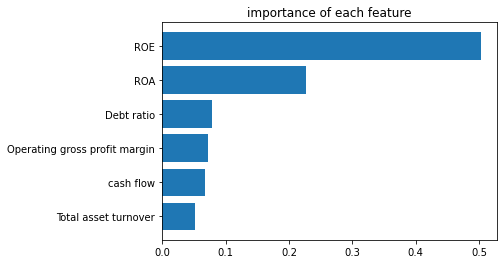

In [27]:
zip(imp,names)
imp, names=zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp,align='center')
plt.yticks(range(len(names)),names)
plt.title('importance of each feature')
plt.show()

In [28]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('C:/Users/HP/Desktop/mldata/mldata_CLEAN.csv')
df1

In [ ]:
KM=KMeans(n_clusters=4)
df2=df1[['Operating gross profit margin','Debt ratio']]
KM.fit(df1[['Operating gross profit margin','Debt ratio']])

In [ ]:
KM.predict(df2)

In [ ]:
a = df2[['Operating gross profit margin']]

b = df2[['Debt ratio']]

In [ ]:
plt.scatter(a,b,c=KM.predict(df2))

In [ ]:
df2 = pd.read_csv('C:/Users/HP/Desktop/mldata/mdata.csv')
df2

In [ ]:
KM=KMeans(n_clusters=4)
df3=df2[['ROA','ROE','Operating gross profit margin','cash flow','Debt ratio','Total asset turnover']]
KM.fit(df3)

In [ ]:
KM.predict(df3)

In [ ]:
d = df3[['cash flow']]

e = df3[['Debt ratio']]

In [ ]:
plt.scatter(d,e,c=KM.predict(df3))